# Progetto Data Manipulation and Visualization

Il mio obiettivo è individuare il settore più adatto in cui lanciare la mia prima app a tema sostenibilità. Per farlo, ho deciso di adottare un approccio data-driven, analizzando un dataset del Google Play Store che contiene informazioni su migliaia di app, tra cui rating, numero di recensioni, installazioni, tipologia (gratuita o a pagamento), prezzo e categoria.

# Importazione Dataset

In [4]:
#Importazione delle librerie per l'analisi dati

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
# Importazione Dataset

app = pd.read_csv('googleplaystore.csv')

# Fase 1 – Esplorazione e Pulizia del Dataset

- Esamino le colonne disponibili.

- Identifico eventuali valori mancanti o anomali (es. rating > 5, stringhe nei numeri).

- Pulisco i dati convertendo i valori testuali in numerici dove necessario.

- Controllo che ogni colonna sia nel formato corretto (float, int, category, ecc.).

## Dimensioni, colonne e tipi di dati

In [10]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
app.shape

(10841, 13)

In [12]:
app.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
app.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [14]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Pulizia e conversione dei tipi di dato

Dal primo sguardo ai dati, noto che diverse colonne sono di tipo `object` quando dovrebbero essere numeriche o categoriche. Questo è tipico quando si importano dati CSV con valori misti o formattazione particolare.

**Problemi identificati:**
- `Reviews`: contiene numeri ma è di tipo object
- `Installs`: contiene valori come "10,000+" che vanno puliti
- `Price`: contiene il simbolo "$" che va rimosso
- `Size`: contiene suffissi come "M" e "K" che vanno convertiti
- Colonne categoriche che possono essere ottimizzate per memoria

In [16]:
# Converto Reviews da object a numerico, gestendo eventuali valori non convertibili
app['Reviews'] = pd.to_numeric(app['Reviews'], errors='coerce')


app['Reviews'] = app['Reviews'].fillna(0).astype('int64')
app['Reviews'].dtype

dtype('int64')

In [17]:
app['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [18]:
app['Installs'] = app['Installs'].str.replace(',','')
app['Installs'] = app['Installs'].str.replace('+','')
app['Installs'] = app['Installs'].replace('Free', np.nan)

In [19]:
app['Installs'] = pd.to_numeric(app['Installs'], errors='coerce')
app['Installs'].head(15)

0        10000.0
1       500000.0
2      5000000.0
3     50000000.0
4       100000.0
5        50000.0
6        50000.0
7      1000000.0
8      1000000.0
9        10000.0
10     1000000.0
11     1000000.0
12    10000000.0
13      100000.0
14      100000.0
Name: Installs, dtype: float64

In [20]:
app['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [21]:
app['Price'] = app['Price'].str.replace('$','')
app['Price'] = pd.to_numeric(app['Price'], errors='coerce')
app['Price'].dtype

dtype('float64')

In [22]:
app['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,    nan,   1.2 ,   1.04])

In [23]:
# Convertire SIZE# Conversione della colonna Size in MB
def convert_size_to_mb(size_str):
    if pd.isna(size_str) or size_str == 'Varies with device':
        return np.nan
    
    if size_str.endswith('M'):
        return float(size_str[:-1])
    elif size_str.endswith('k') or size_str.endswith('K'):
        return float(size_str[:-1]) / 1024
    else:
        return np.nan

# Modiico Size usando la funzione con apply
app['Size'] = app['Size'].apply(convert_size_to_mb)
app['Size'].dtype

dtype('float64')

In [24]:
app['Last Updated'] = pd.to_datetime(app['Last Updated'], errors='coerce')
app['Last Updated'].dtype

dtype('<M8[ns]')

### Ottimizzazione colonne categoriche
Converto le colonne con valori ripetuti in tipo `category` per:
- Ridurre l'uso di memoria
- Migliorare le performance nelle analisi
- Avere maggiore controllo sui valori possibili

In [26]:
app['Category'] = app['Category'].astype('category')
app['Type'] = app['Type'].astype('category') 
app['Content Rating'] = app['Content Rating'].astype('category')

In [27]:
app.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1696
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [28]:
app['Rating'].value_counts()

app.drop(app[app['Rating'] == 19.0].index, inplace = True)

In [29]:
app['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       0
Name: count, dtype: int64

In [30]:
app['Category'] = app['Category'].str.strip()
app.drop(app[app['Category'] == 1.9].index, inplace = True)

In [31]:
medie_reviews = app.groupby('Category').Rating.mean()

In [32]:
medie_categorie = app['Category'].map(medie_reviews)

app['Rating'] = app['Rating'].fillna(medie_categorie)
app['Rating'].isna().any()

False

In [33]:
# Analizzo i valori NaN in % quanti sono, per capire se riempirli o eliminarli

app['Size'].isna().mean().round(2) * 100

16.0

In [34]:
app['Size'] = app['Size'].fillna(app['Size'].median())

In [35]:
app['Type'] = app['Type'].fillna('Free') # Check su Internet

In [36]:
app['Price'].isna().mean().round(2) * 100

app['Price'] = app['Price'].fillna(app['Price'].mean())

In [37]:
app.dropna(subset=['Current Ver', 'Android Ver'], inplace=True)
app.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Analisi Duplicati

In [39]:
app.duplicated().sum() # Controllo quanti duplicati totali ci sono, ovvero tutta la riga uguale

483

In [40]:
app.drop_duplicates(inplace=True) # Li elimino
app.duplicated().sum()

0

In [41]:
app.duplicated(subset=['App']).sum() # Cerco quanti duplicati per nome di App

698

Ordino il DF in primis con il nome delle APP, poi a parità di nome, avremo prima quella con più Reviews, e in caso di Reviews uguali, quella con l'ultima versione disponibile.

Fatto questo andrò ad eliminare i duplicati con il nome App uguale, usando keep=First per tenere la prima occorrenza, mantenendo quindi l'App con più Reviews.

In [43]:
app.sort_values(by=['App','Reviews','Last Updated'], ascending=[True,False,False], inplace=True)

In [44]:
app.drop_duplicates(subset=['App'], keep='first', inplace=True)

In [45]:
app.shape

(9649, 13)

## Fase 2 – Analisi Esplorativa e Strategica del Dataset

Dopo aver completato la pulizia del dataset, ora ho a disposizione 9.649 app uniche del Google Play Store, con dati puliti e consistenti su rating, recensioni, installazioni, prezzi e categorie. È il momento di iniziare un'analisi per scoprire insights che possano guidare la strategia per la mia app sostenibile.

In [48]:
app['Category'].unique()

array(['SPORTS', 'SOCIAL', 'COMICS', 'TOOLS', 'COMMUNICATION',
       'NEWS_AND_MAGAZINES', 'HEALTH_AND_FITNESS', 'FAMILY',
       'BOOKS_AND_REFERENCE', 'LIFESTYLE', 'BUSINESS', 'SHOPPING',
       'MEDICAL', 'GAME', 'FINANCE', 'PERSONALIZATION', 'PHOTOGRAPHY',
       'TRAVEL_AND_LOCAL', 'DATING', 'PRODUCTIVITY', 'ART_AND_DESIGN',
       'FOOD_AND_DRINK', 'VIDEO_PLAYERS', 'HOUSE_AND_HOME',
       'MAPS_AND_NAVIGATION', 'EVENTS', 'EDUCATION', 'AUTO_AND_VEHICLES',
       'WEATHER', 'BEAUTY', 'ENTERTAINMENT', 'LIBRARIES_AND_DEMO',
       'PARENTING'], dtype=object)

In [49]:
app['Category'].value_counts()

Category
FAMILY                 1871
GAME                    946
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PRODUCTIVITY            374
PERSONALIZATION         374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               107
ENTERTAINMENT            87
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           60
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [50]:
cat_sostenibili = ['LIFESTYLE','HEALTH_AND_FITNESS','EDUCATION', 'TRAVEL_AND_LOCAL','FOOD_AND_DRINK', 'SHOPPING']

In [51]:
analisi_categorie = app[app['Category'].isin(cat_sostenibili)].groupby('Category').agg({'App':'count', 'Installs' : 'median', 'Rating':'mean'})
analisi_categorie

,App,Installs,Rating
Category,,,
EDUCATION,107,1000000.0,4.355038
FOOD_AND_DRINK,112,300000.0,4.170585
HEALTH_AND_FITNESS,288,100000.0,4.248238
LIFESTYLE,369,10000.0,4.093641
SHOPPING,202,1000000.0,4.233726
TRAVEL_AND_LOCAL,219,100000.0,4.075330


In [52]:
# Calcolo dell'opportunità = Installazioni / App * Rating

analisi_categorie['Opportunity Score'] = (analisi_categorie['Installs'] / analisi_categorie['App']) * analisi_categorie['Rating']
analisi_categorie = analisi_categorie.round({'Installs' : 0, 'Rating': 2, 'Opportunity Score' : 0})
analisi_categorie_sorted = analisi_categorie.sort_values('Opportunity Score', ascending=False)

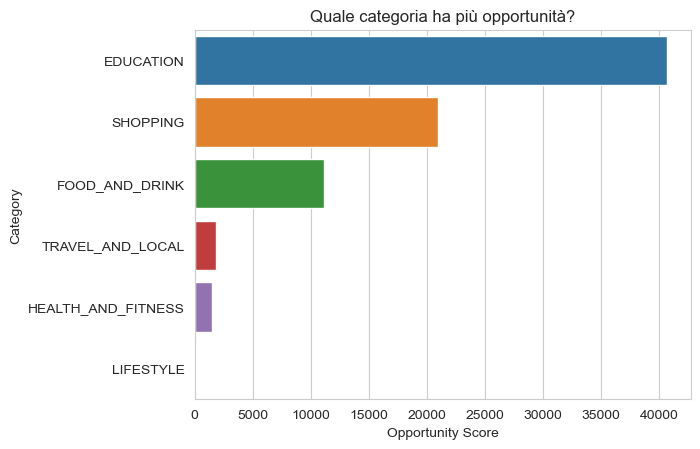

In [53]:
sns.set_style("whitegrid")  # sfondo con griglia leggera

sns.barplot(data=analisi_categorie_sorted, x='Opportunity Score', y='Category', hue='Category')
plt.title('Quale categoria ha più opportunità?')
plt.show()

In [54]:
media_app = analisi_categorie['App'].mean().round(2)
media_installazioni = analisi_categorie['Installs'].mean().round(2)

In [55]:
media_app

216.17

In [56]:
media_installazioni

418333.33

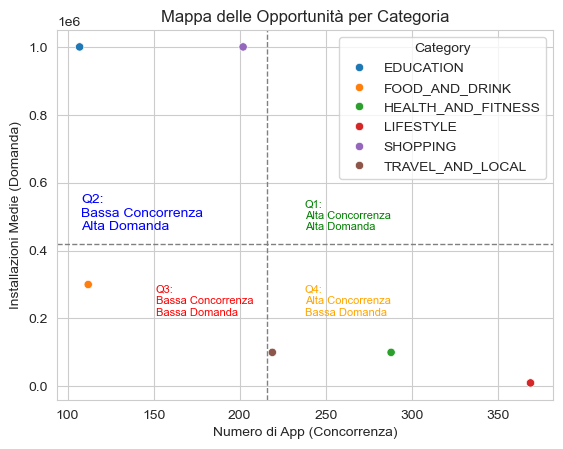

In [57]:
sns.scatterplot(data=analisi_categorie, x='App', y='Installs', hue='Category')

plt.axvline(media_app, color='grey', linestyle='--', linewidth=1)
plt.axhline(media_installazioni, color='grey', linestyle='--', linewidth=1)

plt.title('Mappa delle Opportunità per Categoria')
plt.xlabel('Numero di App (Concorrenza)')
plt.ylabel('Installazioni Medie (Domanda)')

# Annotazioni quadranti
plt.text(media_app * 1.1, media_installazioni * 1.1, 'Q1:\nAlta Concorrenza\nAlta Domanda', fontsize=8, color='green')
plt.text(media_app * 0.5, media_installazioni * 1.1, 'Q2:\nBassa Concorrenza\nAlta Domanda', fontsize=10, color='blue')
plt.text(media_app * 0.7, media_installazioni * 0.5, 'Q3:\nBassa Concorrenza\nBassa Domanda', fontsize=8, color='red')
plt.text(media_app * 1.1, media_installazioni * 0.5, 'Q4:\nAlta Concorrenza\nBassa Domanda', fontsize=8, color='orange')

plt.show()

In [163]:
top3 = analisi_categorie_sorted.head(3)
top3 = top3.reset_index()
top3['Category']

0         EDUCATION
1          SHOPPING
2    FOOD_AND_DRINK
Name: Category, dtype: object

In [171]:
app_top3 = app[app['Category'].isin(top3['Category'])]

In [205]:
app_top3.groupby(['Category', 'Type']).size()

C:\Users\Simon\AppData\Local\Temp\ipykernel_4120\4199832447.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_top3.groupby(['Category', 'Type']).size()


Category        Type
EDUCATION       0         0
                Free    104
                Paid      3
FOOD_AND_DRINK  0         0
                Free    110
                Paid      2
SHOPPING        0         0
                Free    200
                Paid      2
dtype: int64

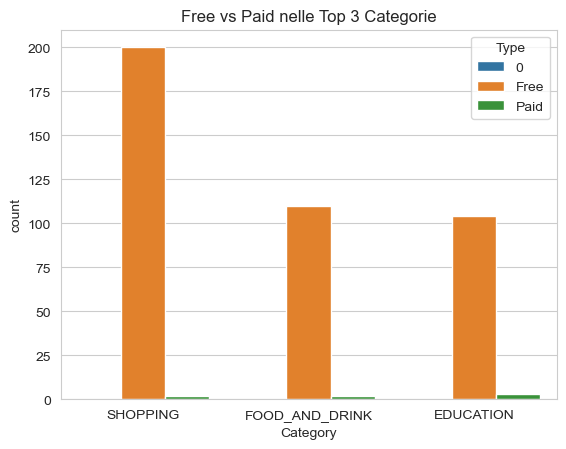

In [201]:
# Mostra quante app Free vs Paid per categoria
sns.countplot(data=app_top3, x='Category', hue='Type')
plt.title('Free vs Paid nelle Top 3 Categorie')
plt.show()

In [207]:
# Parole da cercare (esempi)
parole_sostenibili = ['eco', 'green', 'sustain', 'organic', 'recycle', 'environment']

In [211]:
app[app['App'].str.contains(parole_sostenibili)]

TypeError: unhashable type: 'list'